<a href="https://colab.research.google.com/github/wiradear/Practical-Machine-Leaning-and-Data-Mining/blob/main/6409650311_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 -- Decision tree & random forest

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Part1** : Reading the data

In [ ]:
# Read the data
adult_train = pd.read_csv('/content/drive/MyDrive/CS345/adult_train.txt')
adult_test = pd.read_csv('/content/drive/MyDrive/CS345/adult_test.txt')

In [ ]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [ ]:
X_train = adult_train.drop('target', axis=1)
y_train = adult_train['target']

X_test= adult_test.drop('target', axis=1)
y_test = adult_test['target']

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32561, 14) (32561,)
(16281, 14) (16281,)


In [ ]:
# Encode data (convert feature to number)
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

In [ ]:
# Transform data to dictionary in train set
dicts_X_train = X_train.to_dict('records')

# mapping categories to column
X_train_encoded = dv.fit_transform(dicts_X_train)

print(X_train_encoded.shape)

(32561, 108)


In [ ]:
# Transform data to dictionary in test set
dict_X_test = X_test.to_dict('records')

# transform data to matrix
X_test_encoded = dv.transform(dict_X_test)

print(X_test_encoded.shape)

(16281, 108)


# **Part2** :Decision trees and random forests

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_score_train = []
decision_score_test = []


# looking for the best dept
for depth in range(1, 15, 1): # start, stop, step
  tree = DecisionTreeClassifier(max_depth = depth, random_state = 8)
  tree.fit(X_train_encoded, y_train)
  print("max depth:", depth)
  print("Accuracy on traing set : {:.3f}  ".format(tree.score(X_train_encoded, y_train)))
  print("Accuracy on test set : {:.3f}  ".format(tree.score(X_test_encoded, y_test)))
  print("-----------")

  decision_score_train.append(tree.score(X_train_encoded, y_train))
  decision_score_test.append(tree.score(X_test_encoded, y_test))

max depth: 1
Accuracy on traing set : 0.759  
Accuracy on test set : 0.764  
-----------
max depth: 2
Accuracy on traing set : 0.828  
Accuracy on test set : 0.831  
-----------
max depth: 3
Accuracy on traing set : 0.844  
Accuracy on test set : 0.845  
-----------
max depth: 4
Accuracy on traing set : 0.844  
Accuracy on test set : 0.845  
-----------
max depth: 5
Accuracy on traing set : 0.852  
Accuracy on test set : 0.852  
-----------
max depth: 6
Accuracy on traing set : 0.857  
Accuracy on test set : 0.857  
-----------
max depth: 7
Accuracy on traing set : 0.859  
Accuracy on test set : 0.856  
-----------
max depth: 8
Accuracy on traing set : 0.861  
Accuracy on test set : 0.857  
-----------
max depth: 9
Accuracy on traing set : 0.864  
Accuracy on test set : 0.858  
-----------
max depth: 10
Accuracy on traing set : 0.870  
Accuracy on test set : 0.860  
-----------
max depth: 11
Accuracy on traing set : 0.875  
Accuracy on test set : 0.858  
-----------
max depth: 12
Accur

In [ ]:
decision_score_train

[0.7591904425539756,
 0.8282300912134148,
 0.8438930008292128,
 0.8439544240041768,
 0.8520929946868954,
 0.8569454255090445,
 0.8586345628205522,
 0.8606615275943613,
 0.8639783790424127,
 0.8704278124136237,
 0.8748195694235436,
 0.8799176929455483,
 0.8886090722029422,
 0.8949970823991892]

In [ ]:
decision_score_test

[0.7637737239727289,
 0.8306615072784227,
 0.8447884036607088,
 0.8446655610834716,
 0.8519746944290891,
 0.8571955039616731,
 0.8563356059210122,
 0.856704133652724,
 0.8578097168478594,
 0.8601437258153676,
 0.8575640316933849,
 0.8557828143234445,
 0.8506848473680978,
 0.8501320557705301]

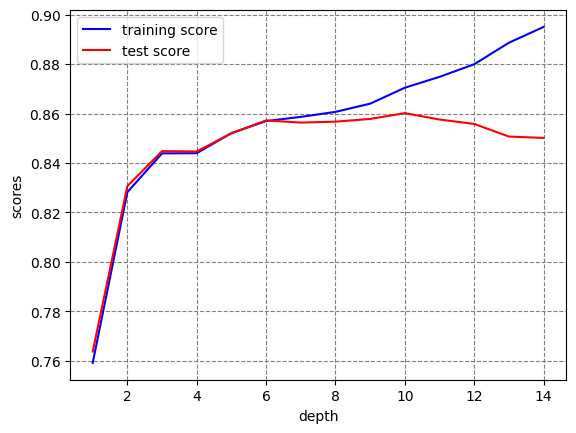

In [ ]:
# Plotting graph
import matplotlib.pyplot as plt

plt.plot(range(1, 15, 1), decision_score_train, 'b')
plt.plot(range(1, 15, 1), decision_score_test, 'r')

plt.legend(['training score', 'test score'])
plt.grid(color='gray', linestyle='--')
plt.xlabel('depth')
plt.ylabel('scores')
plt.show()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randf_score_train = []
randf_score_test = []

for n in range(1, 101):
  forest = RandomForestClassifier(n_estimators = n, n_jobs = -1, random_state = 0)
  forest.fit(X_train_encoded, y_train)
  print("n_estimators:", n)
  print("Accuracy on traing set : {:.3f}  ".format(forest.score(X_train_encoded, y_train)))
  print("Accuracy on test set : {:.3f}  ".format(forest.score(X_test_encoded, y_test)))
  print("-----------")

  randf_score_train.append(forest.score(X_train_encoded, y_train))
  randf_score_test.append(forest.score(X_test_encoded, y_test))

n_estimators: 1
Accuracy on traing set : 0.929  
Accuracy on test set : 0.807  
-----------
n_estimators: 2
Accuracy on traing set : 0.932  
Accuracy on test set : 0.832  
-----------
n_estimators: 3
Accuracy on traing set : 0.965  
Accuracy on test set : 0.830  
-----------
n_estimators: 4
Accuracy on traing set : 0.962  
Accuracy on test set : 0.837  
-----------
n_estimators: 5
Accuracy on traing set : 0.977  
Accuracy on test set : 0.837  
-----------
n_estimators: 6
Accuracy on traing set : 0.975  
Accuracy on test set : 0.843  
-----------
n_estimators: 7
Accuracy on traing set : 0.985  
Accuracy on test set : 0.843  
-----------
n_estimators: 8
Accuracy on traing set : 0.983  
Accuracy on test set : 0.844  
-----------
n_estimators: 9
Accuracy on traing set : 0.989  
Accuracy on test set : 0.841  
-----------
n_estimators: 10
Accuracy on traing set : 0.987  
Accuracy on test set : 0.844  
-----------
n_estimators: 11
Accuracy on traing set : 0.992  
Accuracy on test set : 0.844 

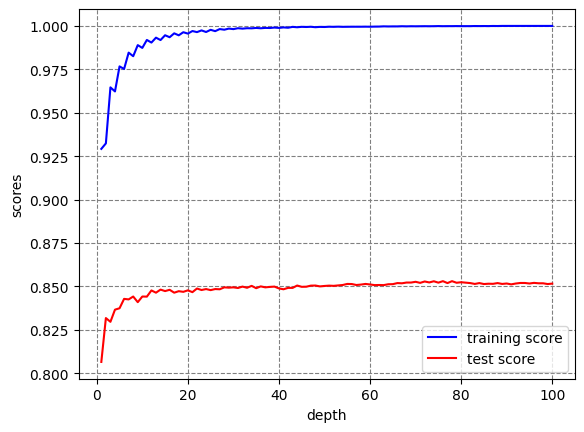

In [ ]:
# Plotting graph
plt.plot(range(1, 101, 1), randf_score_train, 'b')
plt.plot(range(1, 101, 1), randf_score_test, 'r')
plt.legend(['training score', 'test score'])
plt.grid(color='gray', linestyle='--')
plt.xlabel('depth')
plt.ylabel('scores')
plt.show()

**1. การใช้ decision tree และ random forest ที่มีจำนวนต้นไม้เพียง 1 ต้น ให้ผลที่ต่างกันหรือไม่ ท่านคิดว่าเหตุใดจึงเป็นเช่นนั้น**

**ตอบ** ต่างกัน เพราะลักษณะของชุดข้อมูลที่ต่างกัน จากการทำ decision tree ที่ไม่มีการสุ่มชุดข้อมูลในการนำมาทำนาย แต่วิธี random forest มีการทำ bootstrap sampling ทำให้มีบางส่วนของข้อมูลหายไปจากการสุ่มมาตัวอย่างข้อมูลมาใช้ในการสร้างต้นไม้เพื่อทำนาย

**2. ค่าของ test set accuracy เป็นอย่างไรเมื่อจำนวนต้นไม้ใน random forests เพิ่มขึ้น**

**ตอบ** จากเดิมที่จำนวนต้นไม้มีไม่มากพอ ค่า test accuracy ไม่ได้ดีมากเท่าที่ควร แต่เมื่อจำนวนต้นไม้เพิ่มมากขึ้น มีแนวโน้มของค่า test accuracy ที่ดีมากขึ้น ทำนายผลได้ดีมากยิ่งขึ้น

# **Part3** : Feature importances in random forest classifiers

In [ ]:
def plot_feature_importances_adult(model, feature_name):
  importances = pd.Series(model.feature_importances_, index = dv.get_feature_names_out())
  df_importances = pd.DataFrame(importances).rename(columns={0: 'feature_importances'})
  df_importances.sort_values(by='feature_importances').plot(kind='barh', figsize=(10,20))
  plt.xlabel("Feature importance (score)")
  plt.ylabel("Feature")
  plt.grid(color='gray', linestyle='--')
  plt.title(feature_name)

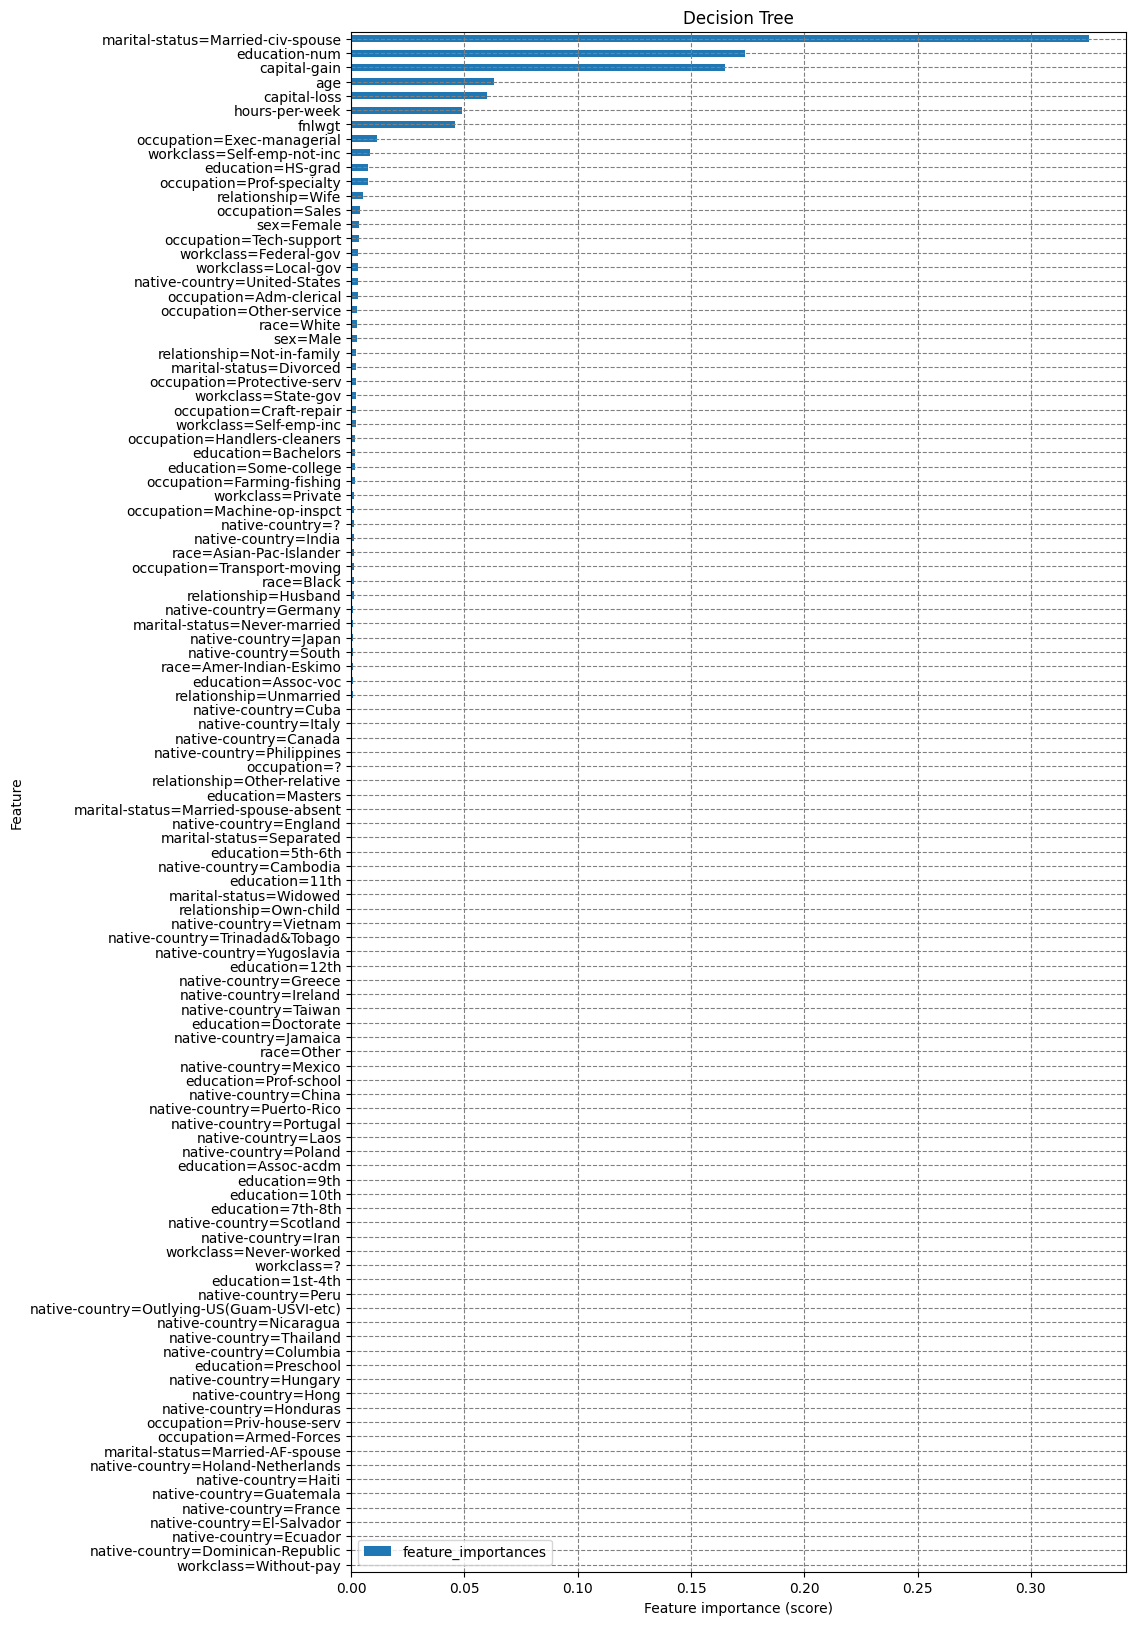

In [ ]:
plot_feature_importances_adult(tree, 'Decision Tree')

สำหรับ Dicision tree
- ตัว feature ที่มีความสำคัญที่สุดอันดับ 1 หรือ feature importance score มากสุดในการตัดสินใจ/split คือ marital-status = Married-civ-spouse คือ คนที่มีสถานะแต่งงานหรือสมรสแล้ว อาจจะมีความสัมพันธ์ในด้านของการมีรายได้ที่คนที่แต่งงานแล้ว มีครอบครัวแล้ว ควรมีรายได้มากพอในการเลี้ยงดูครอบครัว
- ในลำดับความสำคัญที่รองลงมา education-num อาจมีความสัมพันธ์ในแง่ของการที่มีระดับการศึกษาที่สูง ก็มีผลต่อระดับความรู้ความสามารถในการทำงานที่มีประสิทธิภาพพอที่ได้มีรายได้เกิน 50,000 ดอลลาร์ต่อปี
- capital-gain คือกำไรจากการลงทุน อาจมีส่วนช่วยทำให้มีรายได้เพิ่มมาจากเดิมให้เกิน ปีละ 50,000 ดอลล่าร์

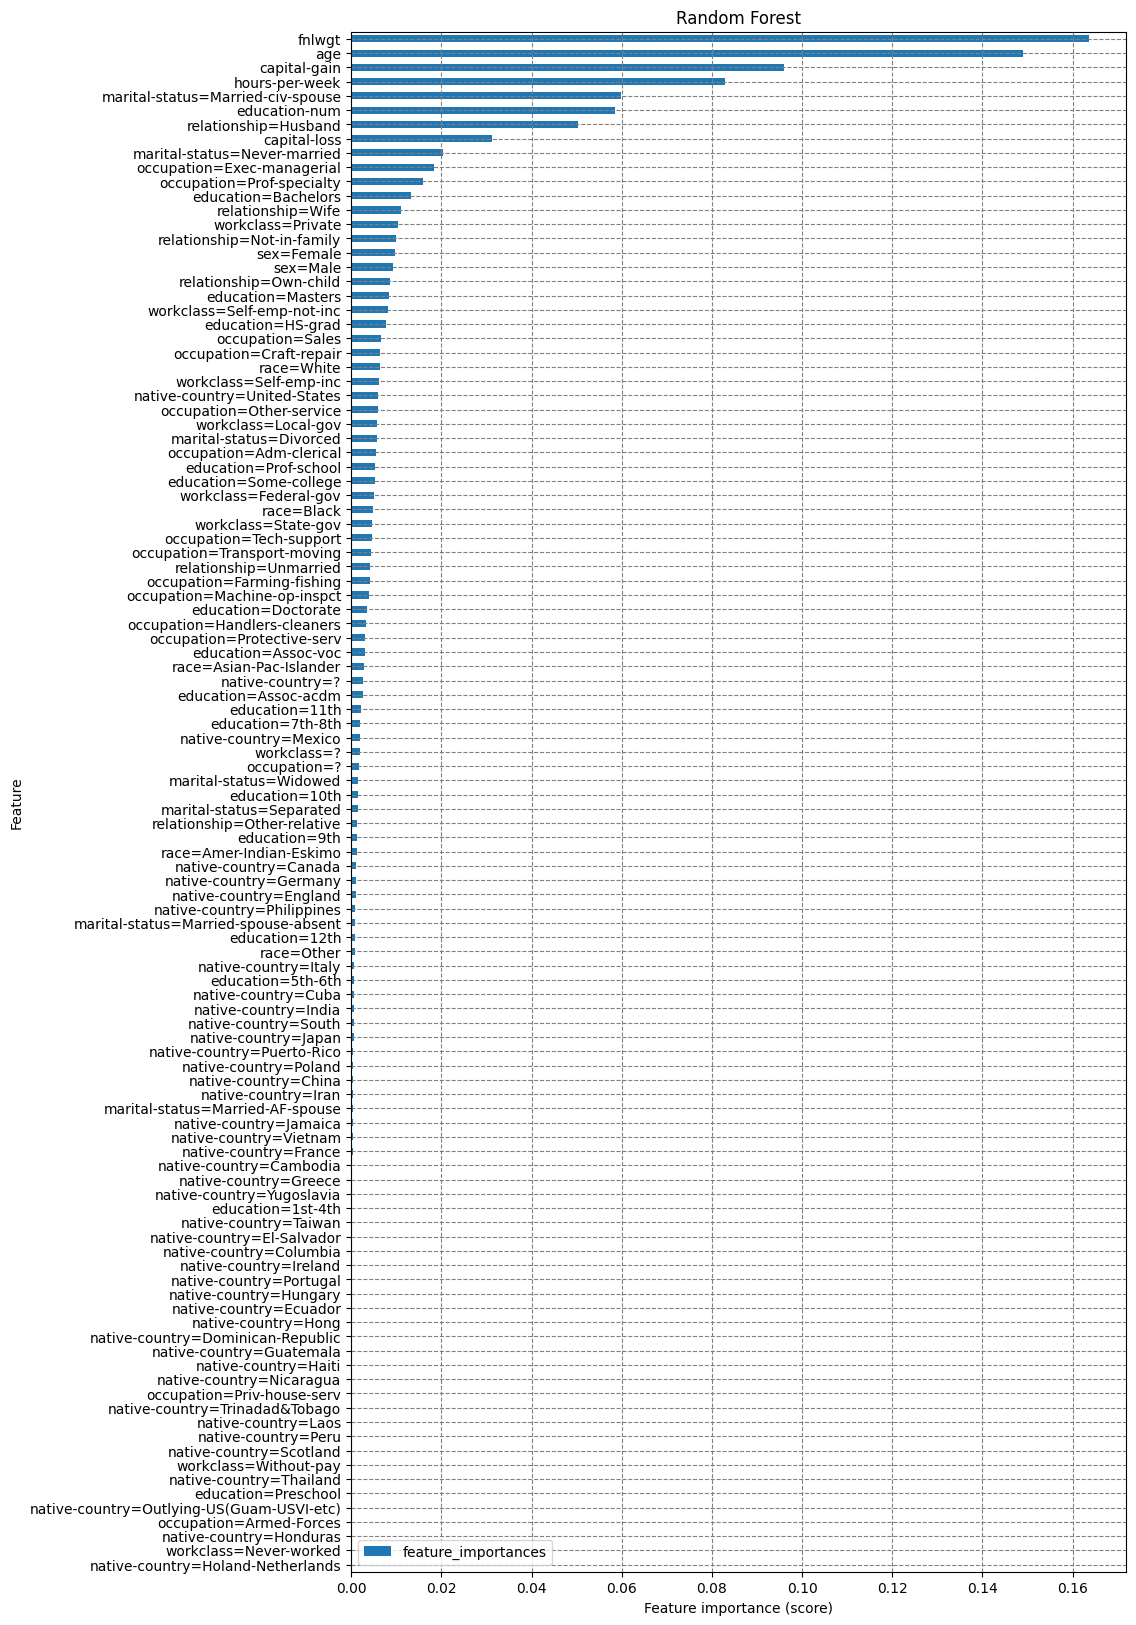

In [ ]:
plot_feature_importances_adult(forest, 'Random Forest')

**สำหรับ Random Forest**

 ตัว feature "fnlwgt" (final weight) หรือ จำนวนคนที่ตัวแทนของในการสำรวจแต่ละกลุ่ม มี ค่า feature importance score มากที่สุดเป็นอันดับแรก เพื่อให้มีการแบ่งข้อมูลได้มีประสิทธิภาพมากที่สุด รองมาด้วยอายุ (age) , capital-gain ตามลำดับ 3 ลำดับแรก

 โดยเรียงลำดับความสำคัญของการเลือก feature ในการ split node และคำนวณว่าตัวไหนควรเป็น root หรือ node ในตัวต่อๆไป ซึ่งดูได้จากค่า feature importance score